## MIS HW2 assignment

### UTEID - ps33296

In [2]:
import pandas as pd
import numpy as np

## 1. NYC Restaurants

In [3]:
nyc_rest_data = pd.read_csv('NYC_Restaurants.csv', dtype=str, index_col=[0])

In [4]:
nyc_rest_data.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


## Q1. Create a unique name for each restaurant

In [5]:
nyc_rest_data['RESTAURANT'] = nyc_rest_data['DBA'] +' '+ nyc_rest_data['BUILDING'] +' '+ nyc_rest_data['STREET'] +' '+ \
                              nyc_rest_data['ZIPCODE'] +' '+ nyc_rest_data['ZIPCODE'] +' '+ nyc_rest_data['BORO']

In [6]:
print(nyc_rest_data['RESTAURANT'].head(10))

0     WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN
1     WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN
2     WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN
3     WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN
4     WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN
5    TOV KOSHER KITCHEN 97-22 63 ROAD 11374 11374 Q...
6    TOV KOSHER KITCHEN 97-22 63 ROAD 11374 11374 Q...
7    TOV KOSHER KITCHEN 97-22 63 ROAD 11374 11374 Q...
8    TOV KOSHER KITCHEN 97-22 63 ROAD 11374 11374 Q...
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


## Q2. How many restaurants are included in the data

In [7]:
# of unique restaurants in the data
len(nyc_rest_data['RESTAURANT'].unique())

10114

## Q3. How many chains are there

In [8]:
# of chains
count_rest = nyc_rest_data[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()
chain_rest = count_rest[count_rest>1]
len(chain_rest)

368

In [9]:
chain_rest

SUBWAY                                             144
MCDONALD'S                                          79
STARBUCKS COFFEE                                    74
DUNKIN' DONUTS                                      69
DUNKIN DONUTS                                       64
                                                  ... 
FIVE GUYS BURGERS & FRIES                            2
TASTY DELICIOUS WEST INDIAN BAKERY & RESTAURANT      2
HARU                                                 2
CHATIME                                              2
JOY BURGER BAR                                       2
Name: DBA, Length: 368, dtype: int64

## Q4. Plot a bar graph of the top 20 most popular chains

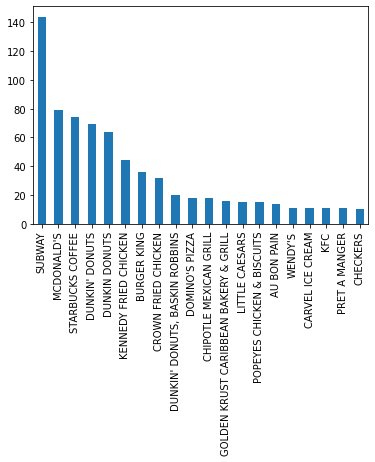

In [11]:
chain_rest[:20].plot(kind='bar')

## Q5. What fraction of all restaurants are chain restaurants? 

In [12]:
n_individual_chain_rest = nyc_rest_data[['DBA','RESTAURANT']].drop_duplicates()[\
                        nyc_rest_data[['DBA','RESTAURANT']].drop_duplicates()['DBA'].isin(chain_rest.index.tolist())].shape[0]

In [13]:
# Change this
n_individual_chain_rest/len(nyc_rest_data['RESTAURANT'].unique())

0.16472216729286138

## Q6. Plot the number of non-chain restaurants in each boro

In [14]:
non_chain_DBA = count_rest[count_rest<= 1].index.tolist()

In [15]:
boro_rest = nyc_rest_data[nyc_rest_data['DBA'].isin(non_chain_DBA)][['BORO', 'RESTAURANT']].drop_duplicates()

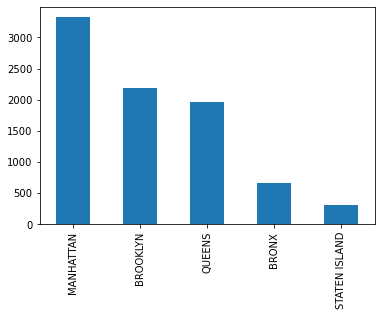

In [16]:
non_chain_rest_per_boro = boro_rest['BORO'].value_counts()[:-1]
non_chain_rest_per_boro.plot(kind = 'bar')

## Q7. Plot the fraction of non-chain restaurants in each boro

In [17]:
total_rest_per_boro = nyc_rest_data[['BORO','RESTAURANT']].drop_duplicates()['BORO'].value_counts()[:-1]

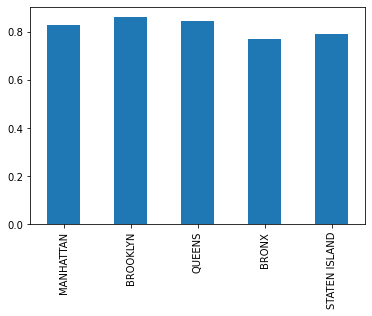

In [18]:
(non_chain_rest_per_boro / total_rest_per_boro).plot(kind='bar')

## Q8. Plot the popularity of cuisines

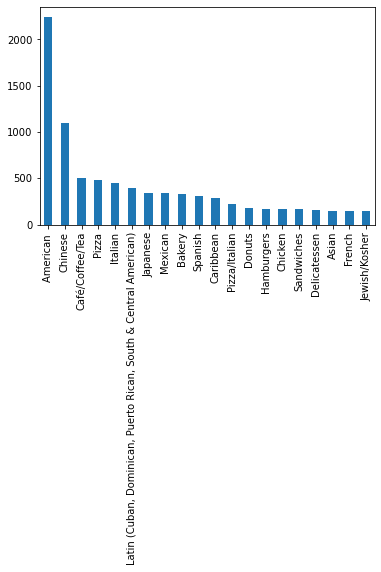

In [19]:
popular_cuisines_top_20 = nyc_rest_data[['CUISINE DESCRIPTION', 'RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
popular_cuisines_top_20[:20].plot(kind='bar')

## Q9.  Plot the cuisines among restaurants which never got cited for violations

In [20]:
cusine_violation = nyc_rest_data[['CUISINE DESCRIPTION', 'RESTAURANT', 'VIOLATION CODE']]

In [21]:
cusine_violation.head(5)

,CUISINE DESCRIPTION,RESTAURANT,VIOLATION CODE
0,Hamburgers,WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN,06C
1,Hamburgers,WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN,10F
2,Hamburgers,WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN,04H
3,Hamburgers,WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN,06A
4,Hamburgers,WENDY'S 469 FLATBUSH AVENUE 11225 11225 BROOKLYN,10F


In [22]:
unique_non_violation_rest = cusine_violation[cusine_violation['VIOLATION CODE'].isnull()]['RESTAURANT'].tolist()

In [23]:
cited_atleast_once = nyc_rest_data['RESTAURANT'][nyc_rest_data[['CUISINE DESCRIPTION', 'RESTAURANT', 'VIOLATION CODE']]['VIOLATION CODE'].notnull()].drop_duplicates()

In [24]:
never_cited_restaurants = set(unique_non_violation_rest).difference(set(cited_atleast_once))

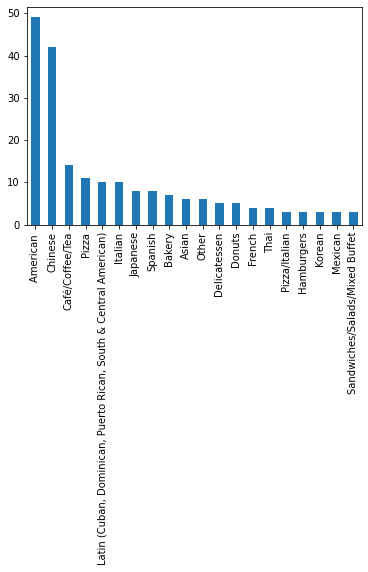

In [25]:
cuisines_never_cited = cusine_violation[cusine_violation['RESTAURANT'].isin(never_cited_restaurants)][['CUISINE DESCRIPTION', 'RESTAURANT']]\
.drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
cuisines_never_cited[:20].plot(kind='bar')

## Q.10. What cuisines tend to be the “cleanest”

In [26]:
cuisine_list = nyc_rest_data[['CUISINE DESCRIPTION', 'RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()

In [27]:
atleast_20_cuisines = cuisine_list[cuisine_list>=20]

In [28]:
cuisines_never_cited_in_atleast20 = cuisines_never_cited[cuisines_never_cited.where(cuisines_never_cited.index.isin(atleast_20_cuisines.index.tolist())).notnull()]

In [29]:
popular_cuisines_top_20_atleast_20 = popular_cuisines_top_20[popular_cuisines_top_20.where(popular_cuisines_top_20.index.isin(atleast_20_cuisines.index.tolist())).notnull()]

In [30]:
merged = pd.merge(cuisines_never_cited_in_atleast20, popular_cuisines_top_20_atleast_20, left_index=True, right_index=True, suffixes=['_never_cited','_popular'])

In [31]:
merged['ratio'] = merged['CUISINE DESCRIPTION_never_cited'] / merged['CUISINE DESCRIPTION_popular']

In [32]:
merged.sort_values(by=['ratio'], ascending=False)[:10]

,CUISINE DESCRIPTION_never_cited,CUISINE DESCRIPTION_popular,ratio
Soul Food,2,22,0.090909
Vietnamese/Cambodian/Malaysia,2,32,0.062500
Other,6,103,0.058252
Barbecue,1,21,0.047619
Soups & Sandwiches,1,21,0.047619
Continental,1,21,0.047619
Asian,6,146,0.041096
Chinese,42,1098,0.038251
Greek,2,55,0.036364
Peruvian,1,28,0.035714


## Q.11. What are the most common violations in each borough? 

In [75]:
nyc_rest_data[['VIOLATION DESCRIPTION', 'BORO']].groupby(['BORO', 'VIOLATION DESCRIPTION'])['VIOLATION DESCRIPTION']\
                                            .agg('count').sort_values().groupby(level=0).tail(1)[1:]['BORO']

BORO           VIOLATION DESCRIPTION                                                                                                                                                                                                                                                          
STATEN ISLAND  Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.     230
BRONX          Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.     500
QUEENS         Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equ

,,VIOLATION DESCRIPTION
BORO,VIOLATION DESCRIPTION,
Missing,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",8
STATEN ISLAND,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",230
BRONX,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",500
QUEENS,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",1416
BROOKLYN,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",1485
MANHATTAN,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",2417


## Q.12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In [34]:
violationFrequency = nyc_rest_data['VIOLATION DESCRIPTION'].value_counts()
violationFrequency

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.    6056
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                 4821
Evidence of mice or live mice present in facility's food and/or non-food areas.                                                                                                                                                                                                    3358
Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.                                

In [35]:
violation_count_by_boro = nyc_rest_data[['VIOLATION DESCRIPTION', 'BORO']].groupby(['BORO', 'VIOLATION DESCRIPTION'])['VIOLATION DESCRIPTION']\
.agg('count')
violation_count_by_boro

BORO           VIOLATION DESCRIPTION                                                                                                                                                                                                                  
BRONX          Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.    12
               ''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted                                                                                                                 1
               ''''Wash hands sign not posted at hand wash facility.                                                                                                                                                                                  

In [36]:
violation_code_count = violation_count_by_boro.to_frame(name='COUNT').reset_index()
violation_code_count.head(3)

,BORO,VIOLATION DESCRIPTION,COUNT
0,BRONX,Choking first aid poster not posted. Alcoho...,12
1,BRONX,''''No Smoking and/or 'Smoking Permitted sig...,1
2,BRONX,''''Wash hands sign not posted at hand wash f...,21


In [37]:
violation_freq_df = violationFrequency.to_frame().reset_index()
violation_freq_df.head(3)

,index,VIOLATION DESCRIPTION
0,Non-food contact surface improperly constructe...,6056
1,Facility not vermin proof. Harborage or condit...,4821
2,Evidence of mice or live mice present in facil...,3358


In [38]:
violation_code_count_merged = violation_code_count.merge(violation_freq_df, left_on='VIOLATION DESCRIPTION', right_on='index', suffixes=['', '_right'])
violation_code_count_merged.head(3)

,BORO,VIOLATION DESCRIPTION,COUNT,index,VIOLATION DESCRIPTION_right
0,BRONX,Choking first aid poster not posted. Alcoho...,12,Choking first aid poster not posted. Alcoho...,135
1,BROOKLYN,Choking first aid poster not posted. Alcoho...,40,Choking first aid poster not posted. Alcoho...,135
2,MANHATTAN,Choking first aid poster not posted. Alcoho...,49,Choking first aid poster not posted. Alcoho...,135


In [39]:
violation_code_count_merged['normalized'] = violation_code_count_merged['COUNT'] / violation_code_count_merged['VIOLATION DESCRIPTION_right']
violation_code_count_merged.head(3)

,BORO,VIOLATION DESCRIPTION,COUNT,index,VIOLATION DESCRIPTION_right,normalized
0,BRONX,Choking first aid poster not posted. Alcoho...,12,Choking first aid poster not posted. Alcoho...,135,0.088889
1,BROOKLYN,Choking first aid poster not posted. Alcoho...,40,Choking first aid poster not posted. Alcoho...,135,0.296296
2,MANHATTAN,Choking first aid poster not posted. Alcoho...,49,Choking first aid poster not posted. Alcoho...,135,0.362963


In [40]:
# Final output (take all the values)
violation_code_count_merged[['BORO', 'VIOLATION DESCRIPTION', 'normalized']]\
.groupby(['BORO', 'VIOLATION DESCRIPTION'])['normalized']\
.agg('max').sort_values().groupby(level=0).tail(1).iloc[1:]

BORO           VIOLATION DESCRIPTION                                                                                                                                                                                    
STATEN ISLAND  Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized.                                                                                                                                   0.090909
BRONX          Unprotected food re-served.                                                                                                                                                                                  0.500000
BROOKLYN       Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.                                                0.714286
MANHATTAN      Potable water supply inadequate. Water or ice not potable or from unapproved sour

## Q.13. How many phone area codes correspond to a single zipcode?

In [41]:
area_code_zip_code_df = pd.concat([nyc_rest_data['PHONE'].map(lambda x:x[:3]),  nyc_rest_data['ZIPCODE']], axis = 1)
area_code_zip_code_df.columns = ['AREACODE', 'ZIPCODE']

In [42]:
count_unique_zipcode = area_code_zip_code_df.groupby('AREACODE')['ZIPCODE'].nunique().reset_index()

In [43]:
# Final Output - Total unique area codes with one to one mapping with zipcode
count_unique_zipcode[count_unique_zipcode['ZIPCODE'] == 1].shape[0]

34

## Q.14. Find common misspellings of street names

In [44]:
nyc_rest_data['STREET TYPE'] = nyc_rest_data['STREET'].str.sWplit(' ').str[-1]

In [45]:
nyc_rest_data['STREET BASE'] = nyc_rest_data['STREET'].str.split(' ').map(lambda x:' '.join(x[:-1]))

In [46]:
nyc_rest_data['STREET BASE & ZIP'] = nyc_rest_data['STREET BASE'] + ' ' + nyc_rest_data['ZIPCODE']

In [47]:
nyc_rest_street_data =  nyc_rest_data[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']].drop_duplicates()
nyc_rest_street_data

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
...,...,...,...
44613,ST,9TH,9TH 11101
44617,AVE,ROGERS,ROGERS 11216
44618,,GRAND AVE,GRAND AVE ...
44619,ST,E 48TH,E 48TH 10017


In [48]:
# checking if street data is NULL/blank anywhere
blank_street_base = nyc_rest_street_data[(nyc_rest_street_data['STREET BASE'] == np.nan) | (nyc_rest_street_data['STREET BASE'] == '') |
                    (nyc_rest_street_data['STREET BASE'] == ' ')].index

In [49]:
nyc_idx = nyc_rest_street_data.index.tolist()

In [50]:
blank_street_base_idx = blank_street_base.tolist()

In [51]:
nyc_rest_street_data_clean = nyc_rest_street_data.loc[set(nyc_idx).difference(set(blank_street_base_idx))]

In [52]:
nyc_street_data_merged = nyc_rest_street_data_clean.merge(nyc_rest_street_data_clean, left_on=['STREET BASE & ZIP'], right_on=['STREET BASE & ZIP'],
                                                    suffixes=['_left', '_right'])
nyc_street_data_merged.head()

,STREET TYPE_left,STREET BASE_left,STREET BASE & ZIP,STREET TYPE_right,STREET BASE_right
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,5,TERMINAL,TERMINAL 11430,5,TERMINAL
2,AVENUE,48,48 11104,AVENUE,48
3,ROAD,63,63 11374,ROAD,63
4,ROAD,63,63 11374,DRIVE,63


In [53]:
nyc_street_data_merged_diff = nyc_street_data_merged[nyc_street_data_merged['STREET TYPE_left'] != nyc_street_data_merged['STREET TYPE_right']]

In [54]:
crosstab = pd.crosstab(nyc_street_data_merged_diff['STREET TYPE_left'], nyc_street_data_merged_diff['STREET TYPE_right'])

In [55]:
crosstab_reset = crosstab.reset_index()

In [56]:
crosstab_reset.head()

STREET TYPE_right,STREET TYPE_left,A,AAVENUE,AIRPORT,AVE,AVENUE,B,BLVD,BOULEARD,BOULEVARD,...,STATION,STREET,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X
0,A,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AAVENUE,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AIRPORT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AVE,0,1,0,0,152,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AVENUE,0,1,0,152,0,0,0,0,0,...,0,11,0,0,0,0,0,0,0,0


In [57]:
# Most common street types for AVE
crosstab_reset['STREET TYPE_left'][crosstab_reset['AVE'] == max(crosstab_reset['AVE'])]

4    AVENUE
Name: STREET TYPE_left, dtype: object

In [58]:
# Most common street types for ST
crosstab_reset['STREET TYPE_left'][crosstab_reset['ST'] == max(crosstab_reset['ST'])]

51    STREET
Name: STREET TYPE_left, dtype: object

In [59]:
# Most common street types for RD
crosstab_reset['STREET TYPE_left'][crosstab_reset['RD'] == max(crosstab_reset['RD'])]

44    ROAD
Name: STREET TYPE_left, dtype: object

In [60]:
# Most common street types for PL
crosstab_reset['STREET TYPE_left'][crosstab_reset['PL'] == max(crosstab_reset['PL'])]

39    PLACE
Name: STREET TYPE_left, dtype: object

In [61]:
# Most common street types for BOULEARD
crosstab_reset['STREET TYPE_left'][crosstab_reset['BOULEARD'] == max(crosstab_reset['BOULEARD'])]

6         BLVD
8    BOULEVARD
Name: STREET TYPE_left, dtype: object

In [62]:
# Most common street types for BULEVARD
crosstab_reset['STREET TYPE_left'][crosstab_reset['BULEVARD'] == max(crosstab_reset['BULEVARD'])]

6         BLVD
8    BOULEVARD
Name: STREET TYPE_left, dtype: object